In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


# Data Anlysis 

I wouldn't say that knowing your data is the most difficult thing in data science, but it is time-consuming. Therefore, it's easy to overlook this initial step and jump too soon into the water.

1. Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.

2. Univariable study. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.

3. Multivariate study. We'll try to understand how the dependent variable and independent variables relate.

4. Basic cleaning.  We'll clean the dataset and handle the missing data, outliers and categorical variables.

5. Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.

In [2]:
# Importing the training dataset

import pandas as pd
training_set=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
# Checking all column names in training set using .columns attribute
training_set.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In Order to understand our data, we can look on each variable and try to understand their meaning and relevance to this problem. I know it will be time consuming but it will give us the best flavour to our dataset 

Do we think about this variable when we are buying a house? (e.g. When we think about the house of our dreams, do we care about its 'Masonry veneer type'?).

If so, how important would this variable be? (e.g. What is the impact of having 'Excellent' material on the exterior instead of 'Poor'? And of having 'Excellent' instead of 'Good'?).

Is this information already described in any other variable? (e.g. If 'LandContour' gives the flatness of the property, do we really need to know the 'LandSlope'?).

SalePrice' is the reason of our quest. It's like when we're going to a party. We always have a reason to be there. Usually, women are that reason. (disclaimer: adapt it to men, dancing or alcohol, according to your preferences)

Using the women analogy, let's build a little story, the story of 'How we met 'SalePrice''.

when we were looking for a dance partner. After a while searching in the dance floor, we saw a girl, near the bar, using dance shoes. That's a sign that she's there to dance. We spend much time doing predictive modelling and participating in analytics competitions, so talking with girls is not one of our super powers. Even so, we gave it a try:

In [4]:
# Descriptive Statistical Summary for SalePrice Column only
training_set['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

It seems that your minimum price is larger than zero. Excellent! You don't have one of those personal traits that would destroy my model! 

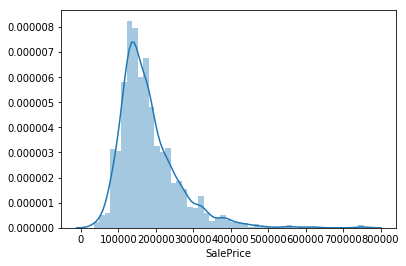

In [5]:
# Histogram Descriptive Visualisation for Saleprice column 
# Seaborn provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sb
# distplot()--Distribution plot for particular column
sb.distplot(training_set['SalePrice'])

In [6]:
# To Know what kind of skewness of our column distribution is..
print("Skewness :%f"%training_set['SalePrice'].skew())

Skewness :1.882876


**Relationship with numerical variable**

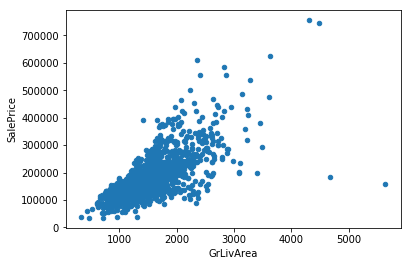

In [7]:
# Scatter plot for grlivarea/SalePrice
# grlivarea----living area
# find relationship with saleprice.
var='GrLivArea'
data=pd.concat([training_set['SalePrice'],training_set[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice')

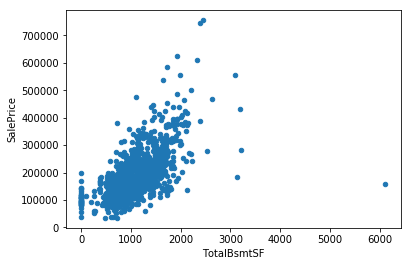

In [8]:
#Hmmm... It seems that 'SalePrice' and 'GrLivArea' are really old friends, with a linear relationship.

#scatter plot totalbsmtsf/saleprice
var='TotalBsmtSF'
data=pd.concat([training_set['SalePrice'],training_set[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice')

'TotalBsmtSF' is also a great friend of 'SalePrice' but this seems a much more emotional relationship! Everything is ok and suddenly, in a strong linear (exponential?) reaction, everything changes. Moreover, it's clear that sometimes 'TotalBsmtSF' closes in itself and gives zero credit to 'SalePrice'.

**Relationship with categorical variable or features**

(-0.5, 9.5, -1105.0, 791005.0)

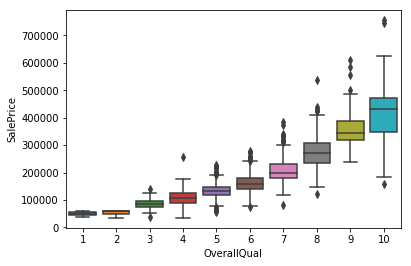

In [9]:
#box plot overallqual/saleprice
var = 'OverallQual'
data=pd.concat([training_set['SalePrice'],training_set[var]],axis=1)
fig=sb.boxplot(x=var,y='SalePrice',data=data)
fig.axis()

(-0.5, 111.5, -1105.0, 791005.0)

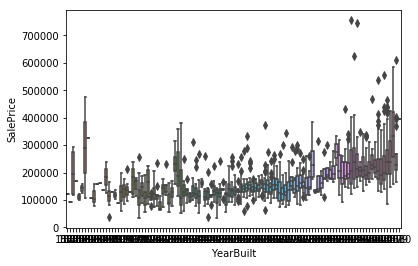

In [10]:
#box plot YearBuilt/saleprice
var='YearBuilt'
data=pd.concat([training_set['SalePrice'],training_set[var]],axis=1)
fig=sb.boxplot(x=var,y='SalePrice',data=data)
fig.axis()

GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.

OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

We just analysed four variables, but there are many other that we should analyse. The trick here seems to be the choice of the right features (feature selection) and not the definition of complex relationships between them (feature engineering).

To explore the universe, we will start with some practical recipes to make sense of our 'plasma soup':

Correlation matrix (heatmap style).
'SalePrice' correlation matrix (zoomed heatmap style).
Scatter plots between the most correlated variables (move like Jagger style).

**Correlation matrix (heatmap style)**

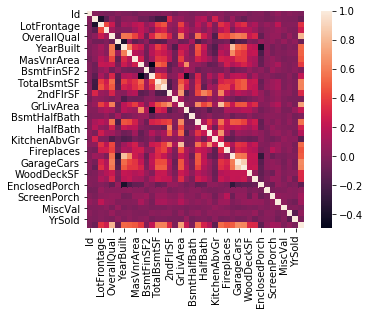

In [11]:
corrmat=training_set.corr()
sb.heatmap(corrmat,square=True)

In my opinion, this heatmap is the best way to get a quick overview for our dataset.

At first sight, there are two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool



**'SalePrice' correlation matrix (zoomed heatmap style)**

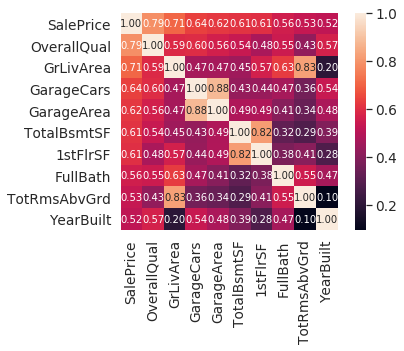

In [12]:
#saleprice correlation matrix
import numpy as np
import matplotlib.pyplot as plt
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(training_set[cols].values.T)
sb.set(font_scale=1.25)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

According to our crystal ball, these are the variables most correlated with 'SalePrice'.

1. 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!

2. 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).

3. TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right (re-read 'So... What can we expect?').

4. 'FullBath'?? Really?

5. 'TotRmsAbvGrd' and 'GrLivArea', twin brothers again. Is this dataset from Chernobyl?

6. It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. Honestly, it scares me to think about 'YearBuilt' because I start feeling that we should do a little bit of time-series analysis to get this right.

**Scatter plots between 'SalePrice' and correlated variables**

Get ready for what you're about to see. I must confess that the first time I saw these scatter plots I was totally blown away! So much information in so short space... It's just amazing.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


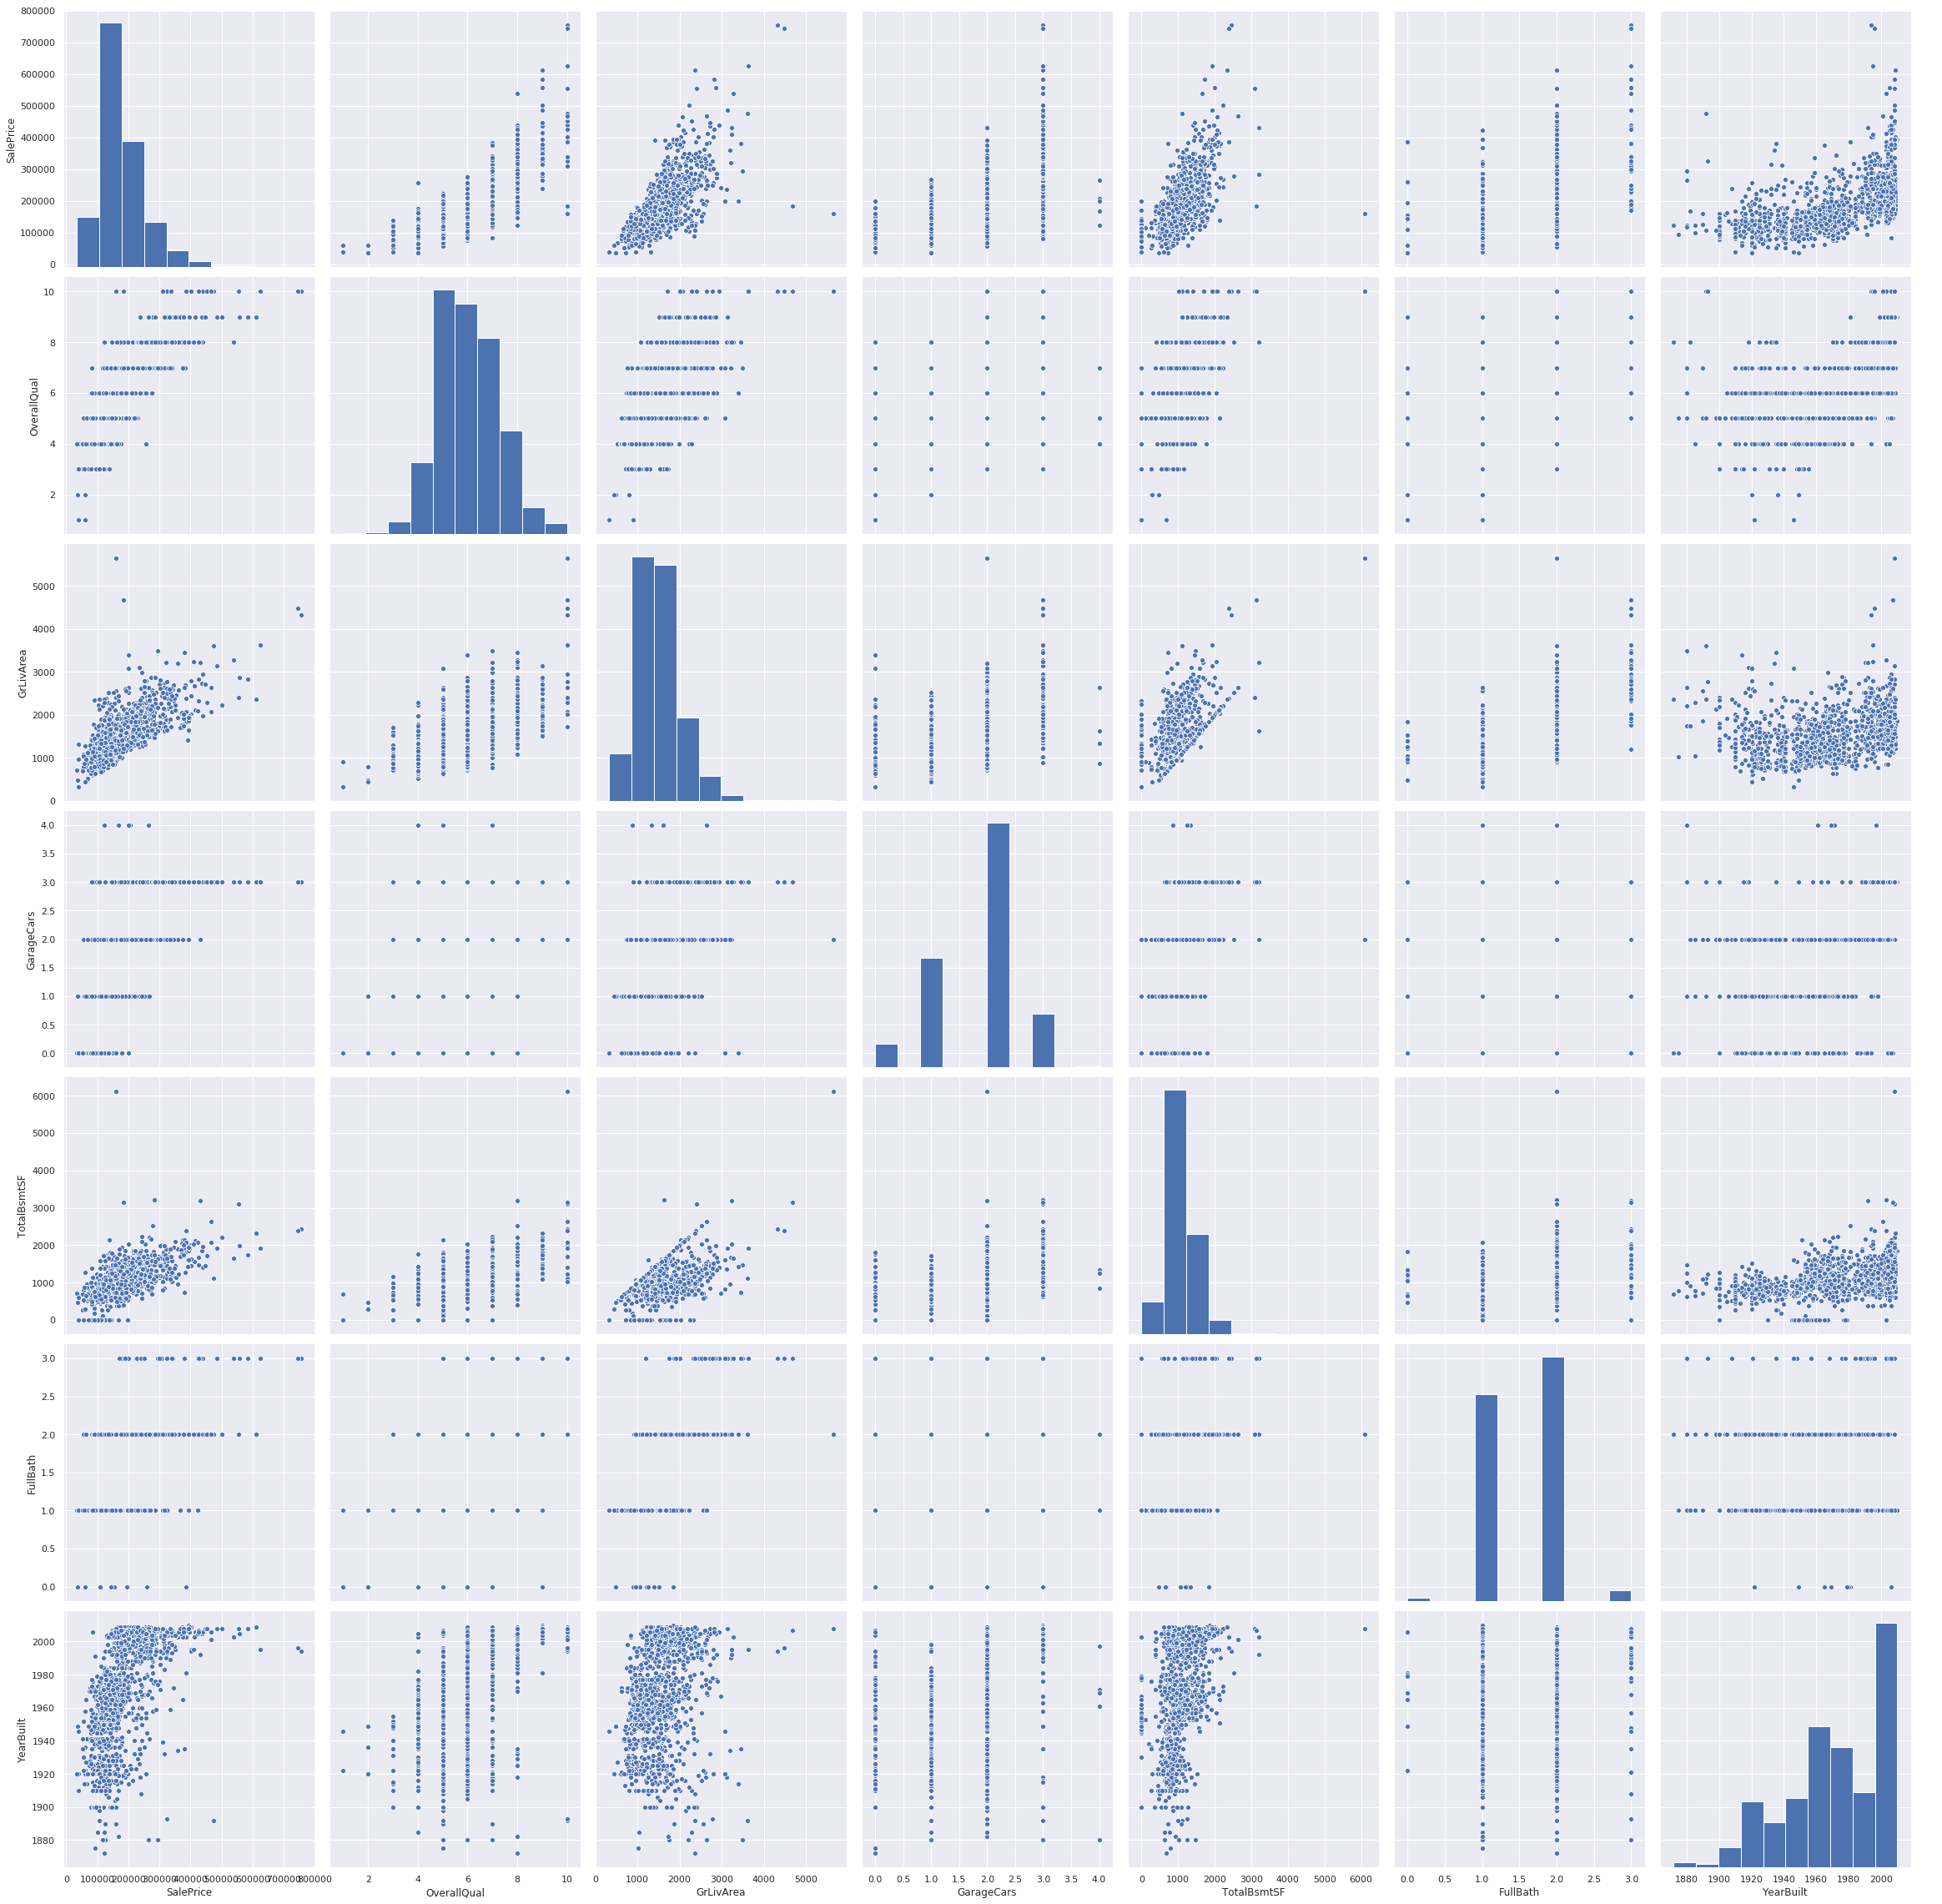

In [13]:
#scatterplot
sb.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sb.pairplot(training_set[cols], size = 4.5)
plt.show()

Although we already know some of the main figures, this mega scatter plot gives us a reasonable idea about variables relationships.

One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).

The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function (be creative). We can also see this same tendency in the upper limit of the 'dots cloud' (be even more creative). Also, notice how the set of dots regarding the last years tend to stay above this limit (I just wanted to say that prices are increasing faster now).

**Missing data**

In [14]:
#missing data
# ascending=False---print value in descending order
total = training_set.isnull().sum().sort_values(ascending=False)
percent = (training_set.isnull().sum()/training_set.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. The point is: will we miss this data? I don't think so. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?). Moreover, looking closer at the variables, we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers, so we'll be happy to delete them.

In what concerns the remaining cases, we can see that 'GarageX' variables have the same number of missing data. I bet missing data refers to the same set of observations (although I will not check it; it's just 5% and we should not spend 20 in5  problems). Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'GarageX' variables. The same logic applies to 'BsmtX' variables.

Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.

In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.

In [15]:
#dealing with missing data
training_set = training_set.drop((missing_data[missing_data['Total'] > 1]).index,1)
training_set = training_set.drop(training_set.loc[training_set['Electrical'].isnull()].index)
training_set.isnull().sum().max() #just checking that there's no missing data missing...

0

**Out liars!**

Outliers is also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

Outliers is a complex subject and it deserves more attention. Here, we'll just do a quick analysis through the standard deviation of 'SalePrice' and a set of scatter plots.



**Univariate analysis**

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

Low range values are similar and not too far from 0.
High range values are far from 0 and the 7.something values are really out of range.
For now, we'll not consider any of these values as an outlier but we should be careful with those two 7.something values.



**Bivariate analysis**

We already know the following scatter plots by heart. However, when we look to things from a new perspective, there's always something to discover.


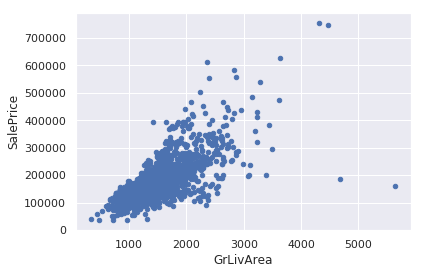

In [16]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([training_set['SalePrice'], training_set[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice');

1. The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.

2. The two observations in the top of the plot are those 7.something observations that we said we should be careful about. They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.

In [17]:
#deleting points
training_set.sort_values(by = 'GrLivArea', ascending = False)[:2]
training_set = training_set.drop(training_set[training_set['Id'] == 1299].index)
training_set = training_set.drop(training_set[training_set['Id'] == 524].index)

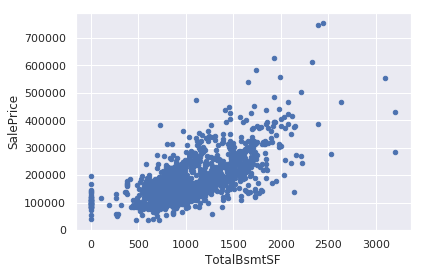

In [18]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([training_set['SalePrice'], training_set[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

We can feel tempted to eliminate some observations (e.g. TotalBsmtSF > 3000) but I suppose it's not worth it. We can live with that, so we'll not do anything.

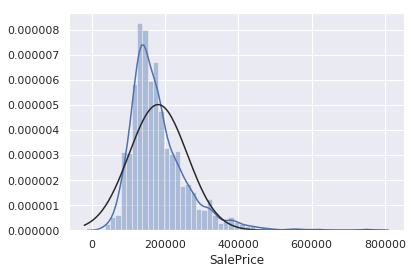

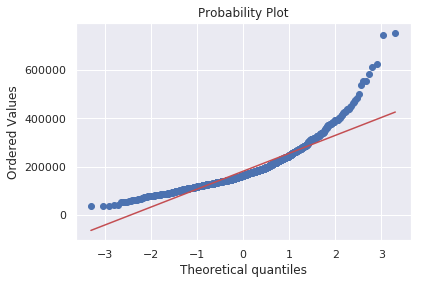

In [19]:
#histogram and normal probability plot
from scipy import stats
from scipy.stats import norm
sb.distplot(training_set['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(training_set['SalePrice'], plot=plt)


Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

But everything's not lost. **A simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: in case of positive skewness, log transformations** usually works well.

In [20]:
#applying log transformation
training_set['SalePrice'] = np.log(training_set['SalePrice'])


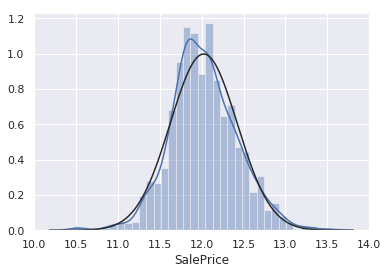

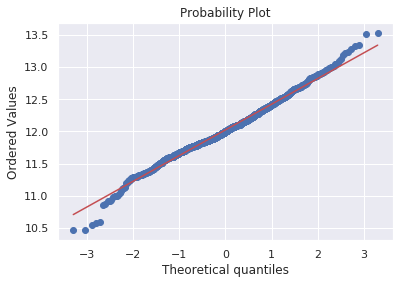

In [21]:
#transformed histogram and normal probability plot
sb.distplot(training_set['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(training_set['SalePrice'], plot=plt)

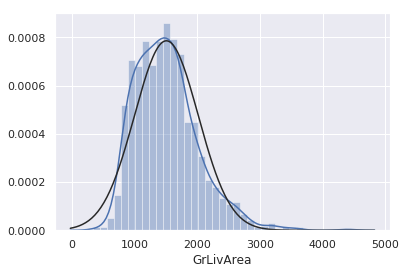

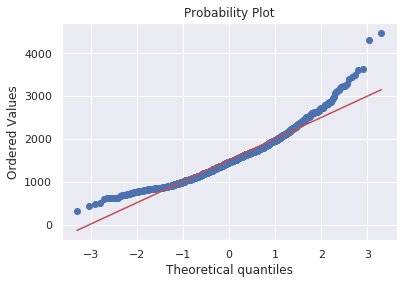

In [22]:
#histogram and normal probability plot
sb.distplot(training_set['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(training_set['GrLivArea'], plot=plt)

In [23]:
#data transformation
training_set['GrLivArea'] = np.log(training_set['GrLivArea'])

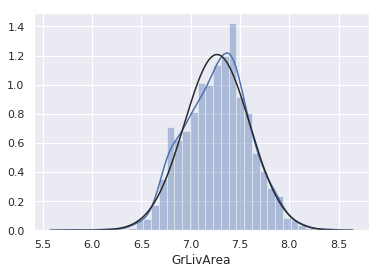

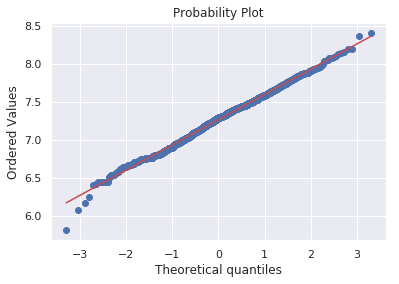

In [24]:
#transformed histogram and normal probability plot
sb.distplot(training_set['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(training_set['GrLivArea'], plot=plt)

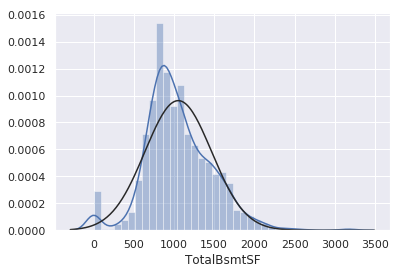

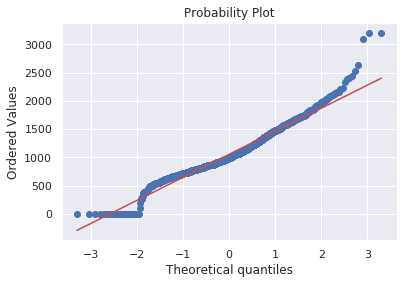

In [25]:
#histogram and normal probability plot
sb.distplot(training_set['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(training_set['TotalBsmtSF'], plot=plt)


To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

In [26]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
training_set['HasBsmt'] = pd.Series(len(training_set['TotalBsmtSF']), index=training_set.index)
training_set['HasBsmt'] = 0 
training_set.loc[training_set['TotalBsmtSF']>0,'HasBsmt'] = 1

In [27]:
#transform data
training_set.loc[training_set['HasBsmt']==1,'TotalBsmtSF'] = np.log(training_set['TotalBsmtSF'])

/opt/conda/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


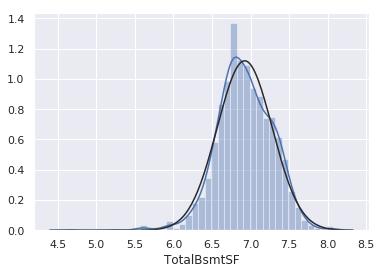

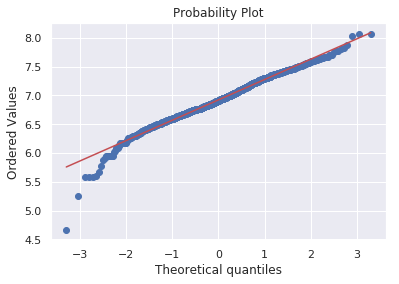

In [28]:
#histogram and normal probability plot
sb.distplot(training_set[training_set['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(training_set[training_set['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

This is how we are analysis the dataset